# Stock Forecasting using Darts

https://github.com/unit8co/darts

In [1]:
# Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from darts import TimeSeries

import warnings
warnings.filterwarnings("ignore")

import yfinance as yf
yf.pdr_override()

In [2]:
stock = 'AMD' # input
start = '2017-01-01' # input 
end = '2021-11-08'  # input
df = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed


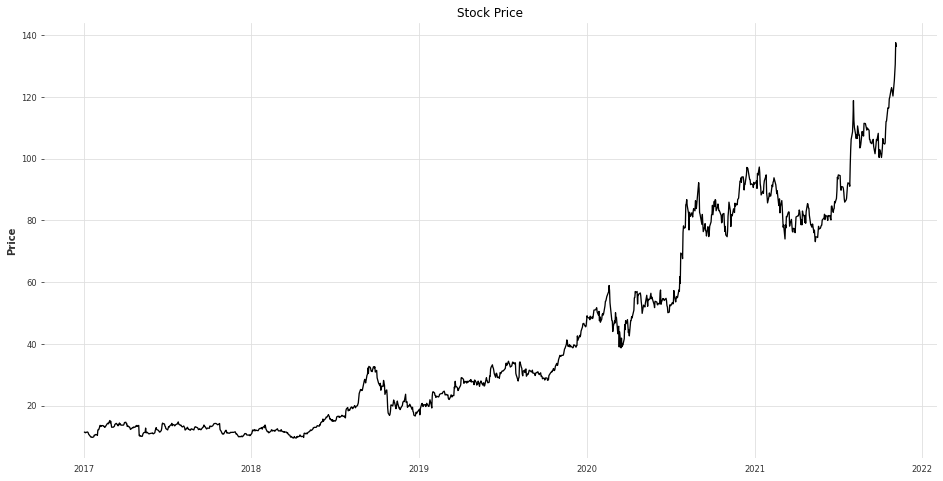

In [3]:
plt.figure(figsize=(16,8))
plt.plot(df['Adj Close'])
plt.title('Stock Price')
plt.ylabel('Price')
plt.show()

In [4]:
dfm = df.resample('M').mean()

In [5]:
dfm.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-31,10.686000,10.887500,10.451000,10.649000,10.649000,4.394452e+07
2017-02-28,13.400526,13.811053,13.098421,13.504737,13.504737,8.273683e+07
2017-03-31,13.825217,14.058696,13.508261,13.802174,13.802174,7.537362e+07
2017-04-30,13.331053,13.520526,13.088421,13.298421,13.298421,4.965176e+07
2017-05-31,11.079091,11.329091,10.784091,11.051364,11.051364,7.801986e+07


In [6]:
dfm = dfm.reset_index()

In [7]:
series = TimeSeries.from_dataframe(dfm, 'Date', 'Adj Close')

In [8]:
train, val = series[:-12], series[-12:]

In [9]:
from darts.models import ExponentialSmoothing

model = ExponentialSmoothing()
model.fit(train)
prediction = model.predict(len(val), num_samples=1000)

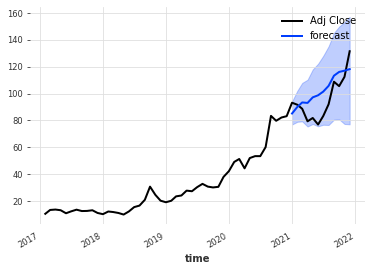

In [10]:
series.plot()
prediction.plot(label='forecast', low_quantile=0.05, high_quantile=0.95)
plt.legend()